In [170]:
import numpy as np
import torch
import torch.nn as nn
from torch.nn import init
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from SSIM_PIL import compare_ssim
from PIL import Image

In [171]:
image1=plt.imread(r'C:\Users\rohan\Downloads\Miniproject (1)\Miniproject\data\image\butterfly.jpg')
image2=plt.imread(r'C:\Users\rohan\Downloads\Miniproject (1)\Miniproject\data\image\fox.jpg')

In [172]:
print(image1.shape)
x,y=np.meshgrid(np.linspace(0,1,512),np.linspace(0,1,512))
x=x.reshape((512*512),1)
y=y.reshape((512*512),1)
pixels=np.hstack((x,y))
pixels=torch.Tensor(pixels)
transforms=torchvision.transforms.ToTensor()
image1=transforms(image1)
print(pixels.numpy().shape)


(512, 512, 3)
(262144, 2)


In [173]:
def psnr(est,gt):
    psnr =-20*np.log10(np.linalg.norm((gt-est).reshape(-1))/(np.sqrt(gt.size)*np.max(gt)))
    return psnr

In [174]:
class Implicit(nn.Module):
    def __init__(self):
        super(Implicit, self).__init__()
        self.linear1=nn.Linear(2,128)
        self.relu1=nn.ReLU()
        self.linear2=nn.Linear(128,256)
        self.linear3=nn.Linear(256,512)
        self.linear4=nn.Linear(512,256)
        self.linear5=nn.Linear(256,128)
        self.linear6=nn.Linear(128,3)
        self.act=nn.Sigmoid()
    def forward(self,x):
        x=self.linear1(x)
        x=self.relu1(x)
        x=self.linear2(x)
        x=self.relu1(x)
        x=self.linear3(x)
        x=self.relu1(x)
        x=self.linear4(x)
        x=self.relu1(x)
        x=self.linear5(x)
        x=self.relu1(x)
        x=self.linear6(x)
        x=self.act(x)
        return x

In [175]:
print(image1.shape)
image1=np.transpose(image1,(1,2,0))

torch.Size([3, 512, 512])


In [176]:
implicit=Implicit()
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(implicit.parameters(),lr = 0.001)
n_epochs=200
x=pixels
train_loss = 0
epochtrack=[]
psnrtrack=[]
simtrack=[]
for epoch in range(n_epochs):
    optimizer.zero_grad()
    out=implicit(x)
    out=out.reshape(512,512,3)
    loss=criterion(out,image1)
    loss.backward()
    optimizer.step()
    print('Epoch: {} \tTraining Loss: {:.6f}'.format(epoch, loss.item()))
    psnrvalue=psnr(out.detach().numpy(),image1.detach().numpy())
    psnrtrack.append(psnrvalue)
    value = compare_ssim(Image.fromarray((out.detach().numpy()*255).astype(np.uint8)),Image.fromarray((image1.detach().numpy()*255).astype(np.uint8)))
    simtrack.append(value)


Epoch: 0 	Training Loss: 0.269024
No module named 'pyopencl'
Epoch: 1 	Training Loss: 0.239970
No module named 'pyopencl'
Epoch: 2 	Training Loss: 0.211081
No module named 'pyopencl'
Epoch: 3 	Training Loss: 0.173771
No module named 'pyopencl'
Epoch: 4 	Training Loss: 0.127599
No module named 'pyopencl'
Epoch: 5 	Training Loss: 0.082394
No module named 'pyopencl'
Epoch: 6 	Training Loss: 0.063683
No module named 'pyopencl'
Epoch: 7 	Training Loss: 0.087542
No module named 'pyopencl'
Epoch: 8 	Training Loss: 0.098115
No module named 'pyopencl'
Epoch: 9 	Training Loss: 0.088584
No module named 'pyopencl'
Epoch: 10 	Training Loss: 0.075131
No module named 'pyopencl'
Epoch: 11 	Training Loss: 0.066616
No module named 'pyopencl'
Epoch: 12 	Training Loss: 0.065358
No module named 'pyopencl'
Epoch: 13 	Training Loss: 0.068345
No module named 'pyopencl'
Epoch: 14 	Training Loss: 0.071524
No module named 'pyopencl'
Epoch: 15 	Training Loss: 0.072485
No module named 'pyopencl'
Epoch: 16 	Trainin

[5.702093058797033, 6.198428696852697, 6.755521916801179, 7.600239821353483, 8.941535367593259, 10.841054873969796, 11.95977066659999, 10.577836420469861, 10.082662948377251, 10.526449190532894, 11.24180598728464, 11.76425085735276, 11.847011483245986, 11.652937724213624, 11.45551455671097, 11.39750879167285, 11.49823299472814, 11.711858055021047, 11.946257551821693, 12.092210025042974, 12.080000146696273, 11.959631493050304, 11.86581306945298, 11.893342308778617, 12.03308191921877, 12.189766315848525, 12.270510112211657, 12.24984156847887, 12.173221044565835, 12.1044166170893, 12.083404976205633, 12.116888837774987, 12.185470374593706, 12.255886900246661, 12.297227055462312, 12.298342765207797, 12.274567686509501, 12.254624071226075, 12.257659827390075, 12.280667129271333, 12.305547222170997, 12.316878835756507, 12.313760011402966, 12.307264360130453, 12.309288874046354, 12.323694787819214, 12.344648366151977, 12.361544833276882, 12.367024789407104, 12.362760027916629, 12.357359637063

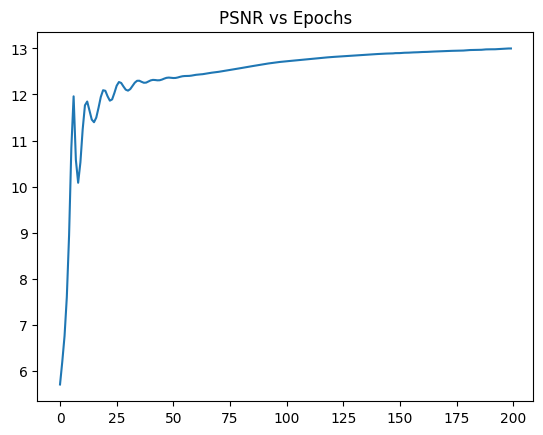

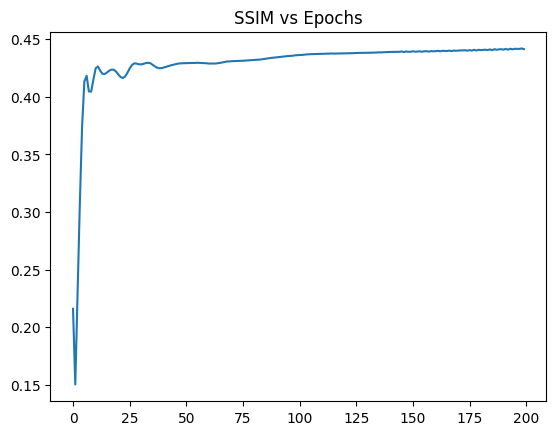

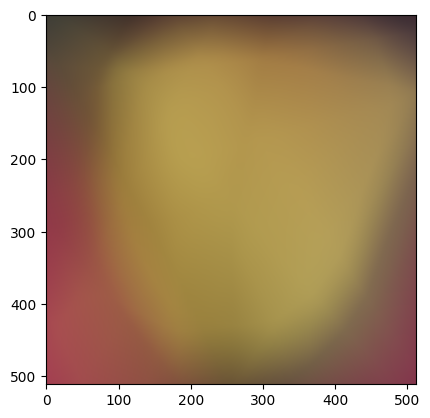

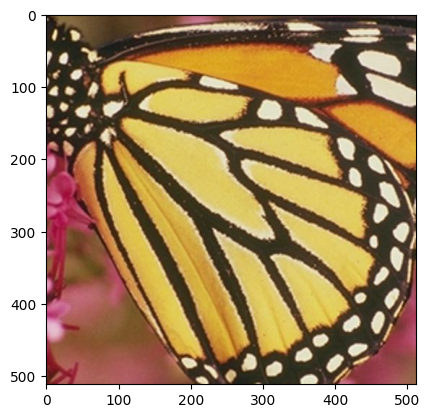

torch.Size([786432])
torch.Size([786432])


In [177]:
print(psnrtrack)
print(simtrack)
plt.plot(psnrtrack)
plt.title('PSNR vs Epochs')
plt.show()
plt.plot(simtrack)
plt.title('SSIM vs Epochs')
plt.show()
out=implicit(pixels)
plt.imshow(out.reshape(512,512,3).detach().numpy())
plt.show()
plt.imshow(image1)
plt.show()
image1=image1.reshape(512*512*3)
out=out.reshape(512*512*3)
print(out.shape)
print(image1.shape)
